# Understanding deep learning requires rethinking generalization


## 과연 딥러닝은 일반화를 제대로 하고 있을까?


![Imgur](https://i.imgur.com/ClpXkdR.png)



과거 머신 러닝의 추세는 아래 그림과 같음 (학부 데이터 마이닝 수업...?)

![Imgur](https://i.imgur.com/J5bOSVq.png)


  
  
그렇다면 딥러닝은 어떤 추세를 가지고 있을까?
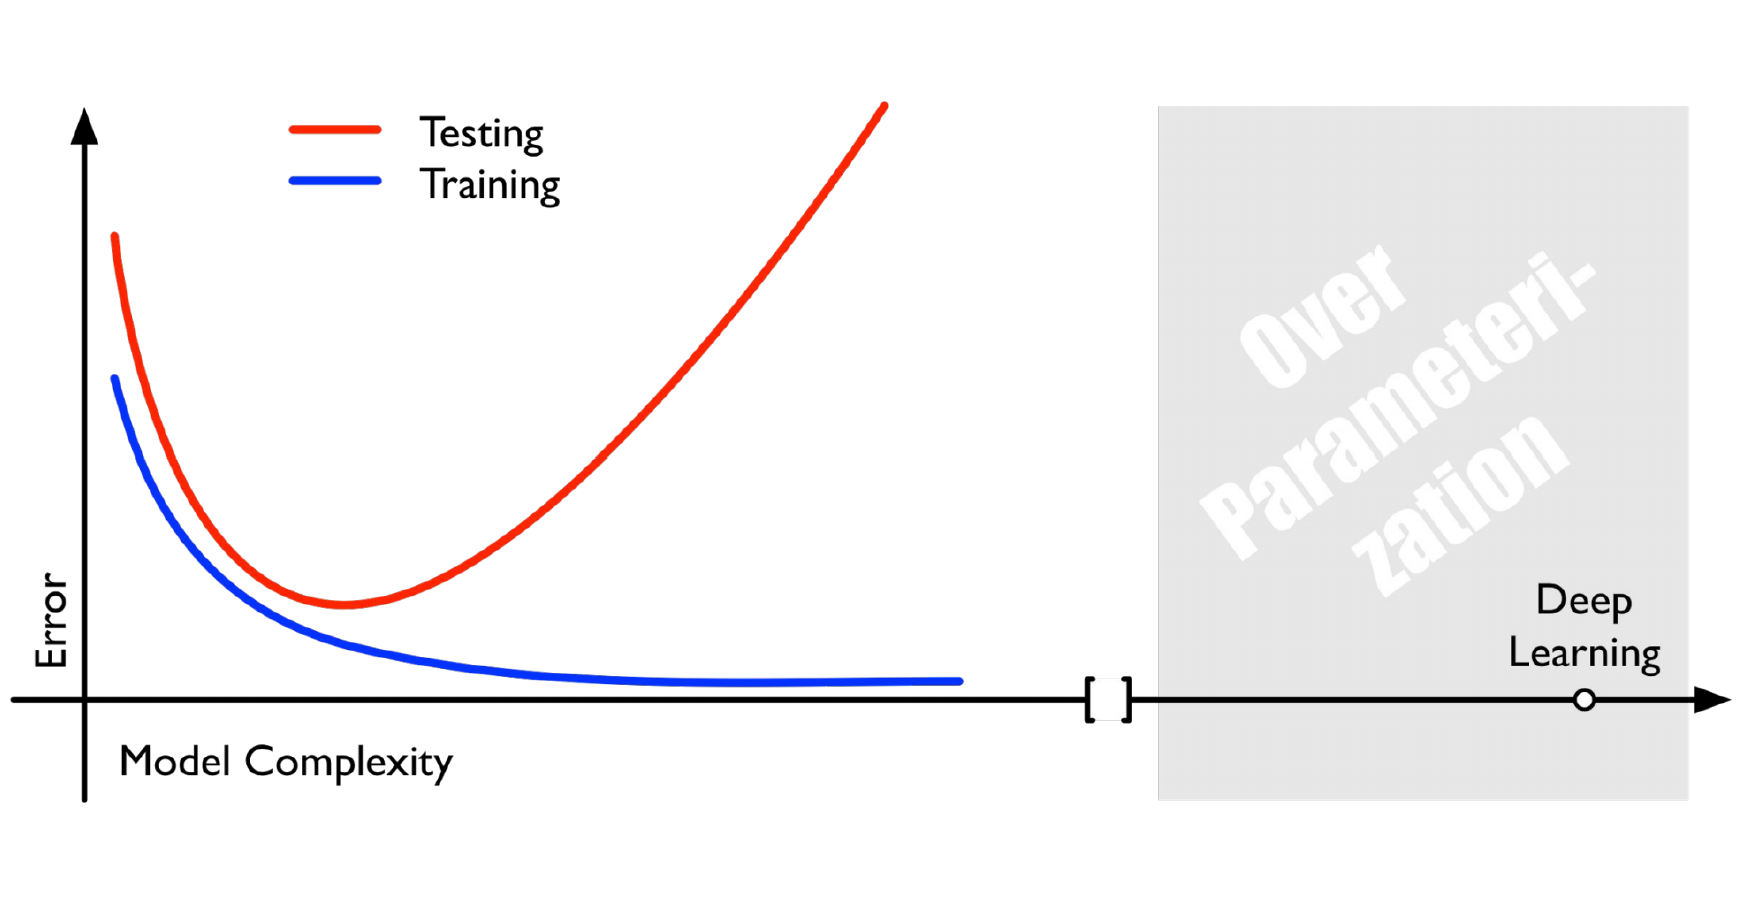

파라미터의 수는 기하급수적으로 증가하고 있음.

$$\frac { P:Parameter }{ N:Sample } $$
- MLP : 24
- AlexNet : 28
- Inception : 33
- Wide ResNet : 179

논문에서는 딥러닝의 일반화에 대한 여러가지 실험을 진행함

- 랜덤 레이블 테스트
- Explicit regularization의 성능에 대한 실험
- Finite sample expressivity
- Implicit regularization에 관한 실험



### Randomization test

아래와 같이 아예 랜덤으로 레이블을 달아서 테스트

![Imgur](https://i.imgur.com/VYVPfW7.png)

![Imgur](https://i.imgur.com/6V8DBhz.png)

딥러닝 모델들이 매우 매우 쉽게 overfit 되는 것을 확인할 수 있음! Training error는 0으로 가고 Testing error는 0.9로 가는 것을 확인할 수 있음. 논문에서는 다음과 같이 요약함

#### The effective capacity of neural networks is sufficient for memorizing the entire data set.



### The Role of Regularization

그렇다면 일반화를 잘 시킨다고 알려진 다음과 같은 기법들은 어떨까?

- Data augmentation
- Dropout
- Weight decay
- Batch normalization
- Early stopping


![Imgur](https://i.imgur.com/UgbDOlz.png)

위 실험 결과를 보면, regularizer가 없을 때 early stopping이 도움을 줄 수 있음.  


![Imgur](https://i.imgur.com/HCEdbOg.png)

  
  
Regularizer가 있어도 딱히..?  
그러나 batch normalization의 유무는 일반화 성능에 영향을 끼침

![Imgur](https://i.imgur.com/KDqFoZb.png)

ImageNet 데이터에서는 weight decay가 일반화를 잘 시키는 것을 확인할 수 있음.

### Finite-sample expressivity

#### 딥러닝 모델이 암기를 한다면, capacity는 얼마나 될까?

$(2n+d)$개의 weight를 가지고, 활성화 함수로 ReLU를 사용하는 2층 뉴럴 네트워크는 $d$차원의 $n$개의 샘플에 대한 어떠한 함수든 표현할 수 있다.

![Imgur](https://i.imgur.com/Bb3Z7hn.png) 


$$A=\left( \begin{matrix} { x }_{ 1 }-{ b }_{ 1 } & 0 & ... & 0 & 0 \\ { x }_{ 2 }-{ b }_{ 1 } & { x }_{ 1 }-{ b }_{ 2 } & ... & 0 & 0 \\ ... & ... & ... & ... & ... \\ { x }_{ n-1 }-{ b }_{ 1 } & { x }_{ n-1 }-{ b }_{ 2 } & ... & { x }_{ n-1 }-{ b }_{ n-1 } & 0 \\ { x }_{ n }-{ b }_{ 1 } & { x }_{ n }-{ b }_{ 2 } & ... & { x }_{ n }-{ b }_{ n-1 } & { x }_{ n }-{ b }_{ n } \end{matrix} \right) $$

- 위 행렬의 Rank는 $n$이 됨(full rank)
- Low-triangular matrix의 모든 eigenvalue는 diagonal elements가 됨. 따라서 가장 작은 eigenvalue는 가장 작은 diagonal element가 됨



$$c(x)=\sum _{ j=1 }^{  }{ { w }_{ j }max\{ \left< a,x \right> -{ b }_{ j },0\}  } $$

만약 모든 1부터 $n$까지의 모든 $i$에 대해서 ${ y }=c({ z }_{ i })$를 모두 만족시키는 $w,b,a$를 찾을 수 있다면 샘플 $S$와 타겟 $y$에 대한 일대일함수 C를 찾을 수 있다는 것을 뜻함

$$c({ z }_{ i })=\sum _{ j=1 }^{  }{ { w }_{ j }max\{ \left< a,x \right> -{ b }_{ j },0\}  } =\left[ max\{ { x }_{ i }-{ b }_{ j }\}  \right] _{ ij }w=Aw$$

위 식에서 $A$는 rank가 $n$이고 $n$ by $n$ 크기의 행렬의 rank가 $n$이면 invertible하다. 따라서 임의의 $a,b$에 해당하는 $w$를 항상 찾을 수 있다.


### Implicit reguralization : an appeal to linear models

딥러닝 모델 이해에 앞서, 과연 선형 모델의 일반화에 대해서도 제대로 이해하고 있을까? 이를 위하여 본 섹션에서는 SGD를 선형 모델에 적용시켜 수식을 전개함. 일반적인 선형 모델에서 Non-negative loss function을 가정하면 empirical risk minimization(ERM)은 아래와 같음.

$$\min _{ w\in { R }^{ d } }{ \frac { 1 }{ n } \sum _{ i=1 }^{ n }{ loss({ w }^{ T }{ x }_{ i },{ y }_{ i }) }  } $$

위 식을 간단히 생각하면 $Xw=y$를 푸는 것으로 바꿔 생각할 수 있음($X$ : $n$ by $d$ matrix)

$d\ge n$이면 Underdetermined이다. (예시 : 다중회귀분석)  
이렇게 되면 다수의 local minima를 가지게 되는데, 이러면 어떤 local minima가 가장 일반화를 잘 하는지 알 수가 없다. 

그렇다면 curvature(곡률)을 보면 global minima를 찾을 수 있지 않을까 싶지만 linear model에서는 모든 solution이 같은 curvature를 같게 됨. 따라서 optimal solution을 알 수가 없다(Curvature는 hessian과 같다고 보면 될 듯). 이에 논문에서는 SGD가 그 해답이 아닐까 싶어서 실험을 진행함.





$$ { w }_{ t+1 }={ w }_{ t }-{ \eta  }_{ t }{ e }_{ t }{ w }_{ { i }_{ t } }$$

만약 ${w}_{0}=0$이면

$${ w }_{ 1 }={ w }_{ 0 }-{ \eta  }_{ 0 }{ e }_{ 0 }{ w }_{ { i }_{ 0 } }=-{ \eta  }_{ 0 }{ e }_{ 0 }{ w }_{ { i }_{ 0 } }$$

$${ w }_{ 2 }={ w }_{ 1 }-{ \eta  }_{ 1 }{ e }_{ 1 }{ w }_{ { i }_{ 1 } }=-{ \eta  }_{ 0 }{ e }_{ 0 }{ w }_{ { i }_{ 0 } }-{ \eta  }_{ 1 }{ e }_{ 1 }{ w }_{ { i }_{ 1 } }$$

$${ w }=\sum _{ i=1 }^{ n }{ { { \alpha  }_{ i }{ x }_{ i } } } $$

정리하면, SGD로 찾은 $w$는 data point의 vector space을 span한다. 

(Span : 벡터들의 linear combination으로 나타낼 수 있는 모든 벡터들의 집함)

${ w }={ X }^{ T }\alpha $로 두면 $X{ X }^{ T }\alpha =y$가 된다. $X{X}^{T}$는 n by n matrix이고 y는 n vector이므로 $\alpha$는 유일하게 결정된다. 이는 ERM처럼 수많은 결과값이 나오는것과는 대조적이다.

여기에 kernel trick 까지 쓰면 비선형 데이터까지 나눌 수 있음!

논문에서는 SGD를 사용하여 구한 해는 L2-norm을 최소화하는 것과 같다는 것을 확인함. 

![Imgur](https://i.imgur.com/zlfFKYE.png)

추가 실험을 통해 확인해보니 MNIST에러가 1.2%로 매우 좋은 성능을 보여줌. 그러나 gabor filter를 사용할 경우 norm이 390으로 filter를 사용하지 않은 경우(220)에 비해 norm값이 더 큼. 그래서 SGD로 구한게 아주 꼭 맞아떨어지는 것은 아닌듯...


## Conclustion

- Deep learning은 원칙적으로 학습 데이터를 모두 기억할 수 있는 복잡도를 가짐
- 이는 전통적인 statistical learning theory에 반대되는 사례
- 따라서 딥러닝의 일반화는 전통적인 모델과 다른 형태를 보이며 재고가 필요함
